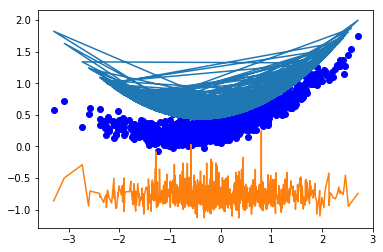

step: 0, w1: [ 0.12885506], w2: [ 0.13325618], b: [ 0.43890157], loss: 0.0443243


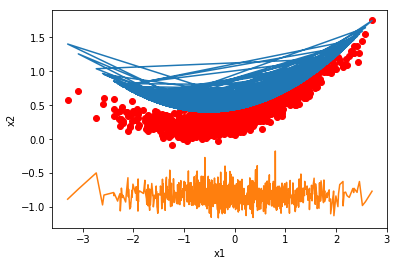

step: 1, w1: [ 0.10658682], w2: [ 0.1403977], b: [ 0.42195189], loss: 0.0301426


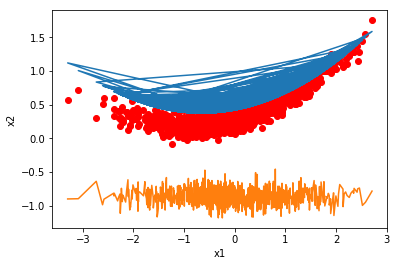

step: 2, w1: [ 0.09227137], w2: [ 0.14656308], b: [ 0.40890148], loss: 0.0230463


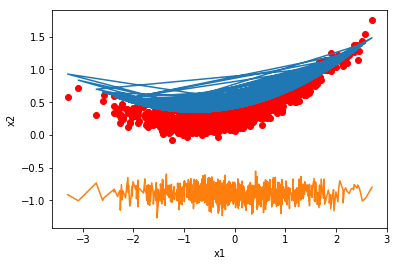

step: 3, w1: [ 0.0832941], w2: [ 0.15193875], b: [ 0.39857924], loss: 0.0192804


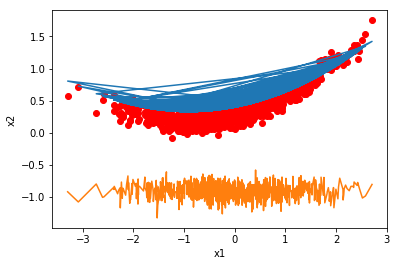

step: 4, w1: [ 0.07788787], w2: [ 0.15666342], b: [ 0.39018747], loss: 0.0171116


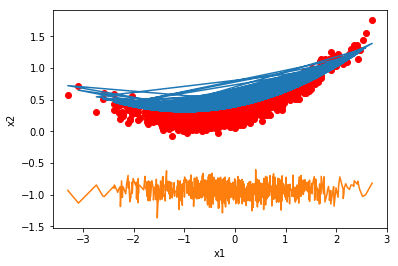

step: 5, w1: [ 0.07485906], w2: [ 0.16084227], b: [ 0.38318154], loss: 0.0157352


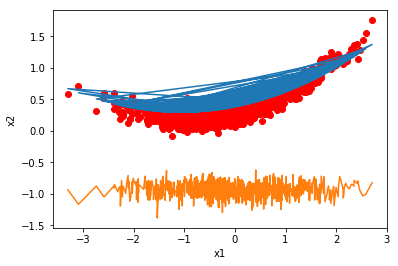

step: 6, w1: [ 0.07340211], w2: [ 0.16455673], b: [ 0.37718838], loss: 0.0147736


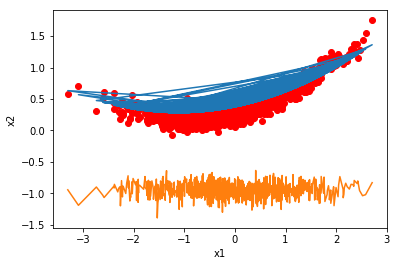

step: 7, w1: [ 0.07297397], w2: [ 0.1678711], b: [ 0.37195125], loss: 0.0140463


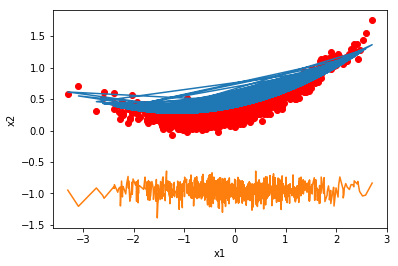

step: 8, w1: [ 0.07320921], w2: [ 0.17083724], b: [ 0.36729243], loss: 0.0134644


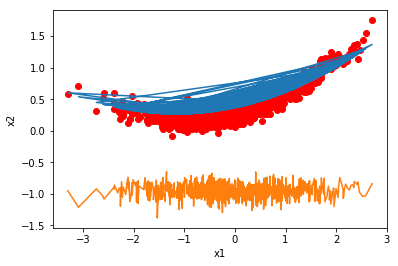

step: 9, w1: [ 0.07386243], w2: [ 0.17349775], b: [ 0.36308789], loss: 0.0129817


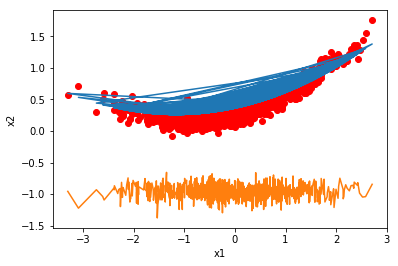

step: 10, w1: [ 0.07476941], w2: [ 0.17588826], b: [ 0.35925019], loss: 0.0125725


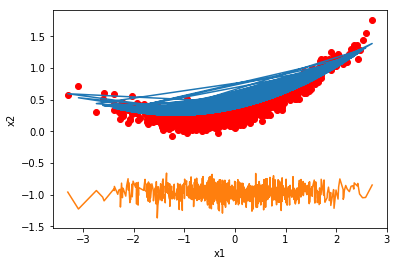

step: 11, w1: [ 0.07582075], w2: [ 0.17803897], b: [ 0.35571679], loss: 0.0122212


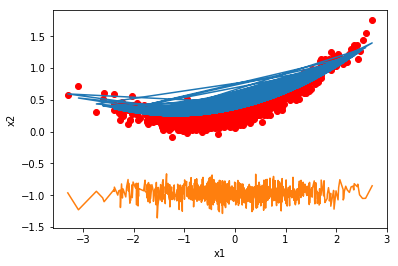

step: 12, w1: [ 0.07694403], w2: [ 0.1799759], b: [ 0.35244223], loss: 0.0119173


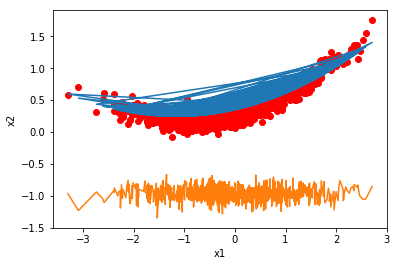

step: 13, w1: [ 0.07809179], w2: [ 0.18172163], b: [ 0.34939277], loss: 0.0116531


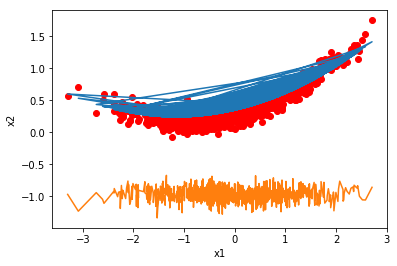

step: 14, w1: [ 0.07923334], w2: [ 0.18329594], b: [ 0.34654278], loss: 0.0114229


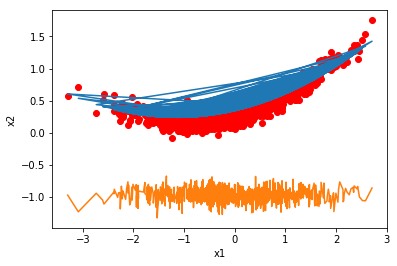

step: 15, w1: [ 0.0803493], w2: [ 0.1847163], b: [ 0.34387225], loss: 0.0112217


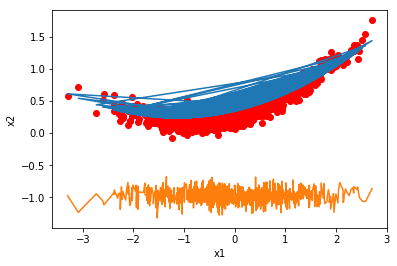

step: 16, w1: [ 0.0814278], w2: [ 0.1859982], b: [ 0.34136513], loss: 0.0110457


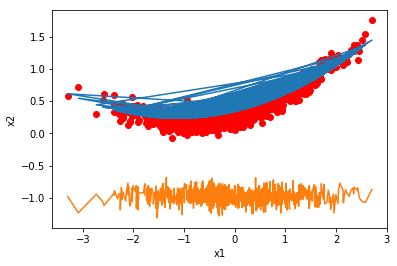

step: 17, w1: [ 0.08246201], w2: [ 0.18715546], b: [ 0.33900824], loss: 0.0108915


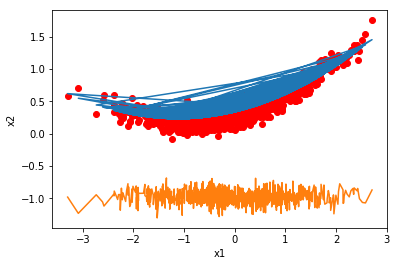

step: 18, w1: [ 0.08344845], w2: [ 0.1882004], b: [ 0.33679038], loss: 0.0107563


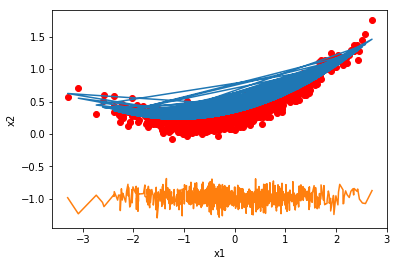

step: 19, w1: [ 0.08438582], w2: [ 0.18914409], b: [ 0.3347019], loss: 0.0106375


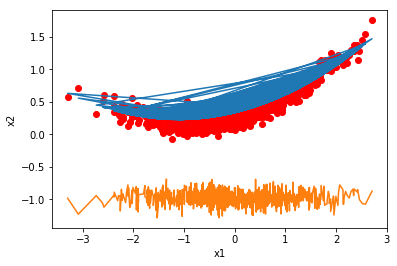

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math,time

num_points=1000
vector=[]
for i in range(num_points):
    x1=np.random.normal(0,1)
    x2=0.1*x1*x1+0.2*x1+0.3+np.random.normal(0,0.1)
    vector.append([x1,x2])
    
x1_data=[v[0] for v in vector]
x2_data=[v[1] for v in vector]

W1=tf.Variable(tf.random_uniform([1],0,0.2))
W2=tf.Variable(tf.random_uniform([1],0,0.4))
b=tf.Variable(tf.random_uniform([1],0,0.6))
x2=W1*x1_data*x1_data+W2*x1_data+b
loss=tf.reduce_mean(tf.square(x2-x2_data))
optimizer=tf.train.GradientDescentOptimizer(0.05)
train=optimizer.minimize(loss)

init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

x1_data_sorted=sorted(x1_data)

plt.plot(x1_data,x2_data,'bo')
plt.plot(x1_data,sess.run(W1)*x1_data*x1_data+sess.run(W2)*x1_data+sess.run(b))
plt.plot(x1_data_sorted,sess.run(W1)*x1_data*x1_data+sess.run(W2)*x1_data+sess.run(b)-x2_data-1)
plt.show()
#print(sess.run(W1),sess.run(W2),sess.run(b))
#print(x1_data)

iteration=20
for step in range(iteration):
    sess.run(train)
    print("step: %s, w1: %s, w2: %s, b: %s, loss: %s"%(step,sess.run(W1),sess.run(W2),sess.run(b), sess.run(loss)))
    
    plt.plot(x1_data,x2_data,'ro')
    plt.plot(x1_data,sess.run(W1)*x1_data*x1_data+sess.run(W2)*x1_data+sess.run(b))
    plt.plot(x1_data_sorted,sess.run(W1)*x1_data*x1_data+sess.run(W2)*x1_data+sess.run(b)-x2_data-1)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()
    time.sleep(1)